# **1. Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Reading data
df=pd.read_csv('/content/world_population.csv')

# **2. Data Understanding**

In [ ]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [ ]:
df.tail()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537.0,15669666.0,14154937.0,12839771.0,11834676.0,10113893.0,7049926.0,5202918.0,390757.0,41.7665,1.0204,0.20


In [ ]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [ ]:
df.dtypes

,0
Rank,int64
CCA3,object
Country,object
Capital,object
Continent,object
2022 Population,float64
2020 Population,float64
2015 Population,float64
2010 Population,float64
2000 Population,float64


In [ ]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.300000e+02,2.330000e+02,2.300000e+02,2.270000e+02,2.270000e+02,2.290000e+02,2.290000e+02,2.300000e+02,2.320000e+02,230.000000,232.000000,234.000000
mean,117.500000,3.463225e+07,3.360071e+07,3.206600e+07,3.027016e+07,2.684050e+07,1.933046e+07,1.628288e+07,1.586650e+07,5.816637e+05,456.811652,1.009553,0.427051
std,67.694165,1.378892e+08,1.358732e+08,1.315071e+08,1.260742e+08,1.133525e+08,8.130962e+07,6.934547e+07,6.835586e+07,1.769133e+06,2083.740364,0.013390,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.064710e+05,3.942950e+05,3.827265e+05,3.294700e+05,2.619280e+05,2.237520e+05,1.458805e+05,2.567250e+03,36.598125,1.001925,0.010000
50%,117.500000,5.762857e+06,5.456681e+06,5.244415e+06,4.889741e+06,4.491202e+06,3.785847e+06,3.135123e+06,2.511718e+06,7.714100e+04,95.346750,1.007900,0.070000
75%,175.750000,2.265372e+07,2.152263e+07,1.973085e+07,1.682585e+07,1.562547e+07,1.188276e+07,9.817257e+06,8.817329e+06,4.146432e+05,236.884000,1.016650,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

# **3. Data Preperation**

In [ ]:
#dropping the unnecessary columns
df.drop(['CCA3'], axis=1, inplace=True)

In [ ]:
df.nunique()

,0
Rank,234
Country,234
Capital,234
Continent,6
2022 Population,230
2020 Population,233
2015 Population,230
2010 Population,227
2000 Population,227
1990 Population,229


In [ ]:
#Checking for missing values
df.isnull().sum()

,0
Rank,0
Country,0
Capital,0
Continent,0
2022 Population,4
2020 Population,1
2015 Population,4
2010 Population,7
2000 Population,7
1990 Population,5


In [ ]:
#Handling missing values
population_columns = [col for col in df.columns if 'Population' in col]
df[population_columns] = df[population_columns].fillna(df[population_columns].median())
df['Area (km²)'].fillna(df['Area (km²)'].mean(), inplace=True)
df['Density (per km²)'].fillna(df['Density (per km²)'].mean(), inplace=True)
df['Growth Rate'].fillna(df['Growth Rate'].median(), inplace=True)

<ipython-input-13-5920280afa33>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area (km²)'].fillna(df['Area (km²)'].mean(), inplace=True)
<ipython-input-13-5920280afa33>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df.isnull().sum()

,0
Rank,0
Country,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0
1990 Population,0


In [ ]:
df.duplicated().sum()

0

# **4. Feature Understanding**

a. Univariate Analysis

In [ ]:
df['Growth Rate'].value_counts()

,count
Growth Rate,
1.0079,5
1.0038,4
1.0052,3
1.0058,3
1.0074,3
...,...
1.0218,1
1.0242,1
1.0037,1


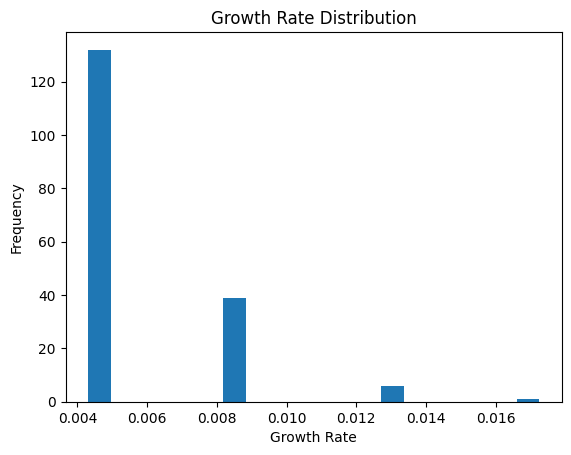

In [ ]:
df['Growth Rate'].value_counts(normalize=True).plot(kind='hist', bins=20)
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.title('Growth Rate Distribution')
plt.show()

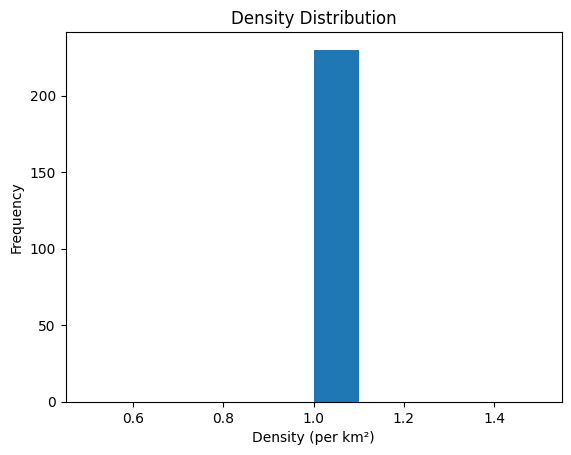

In [ ]:
df['Density (per km²)'].value_counts().plot(kind='hist')
plt.xlabel('Density (per km²)')
plt.ylabel('Frequency')
plt.title('Density Distribution')
plt.show()

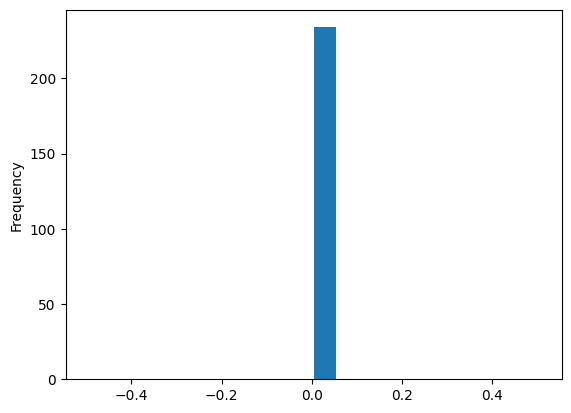

In [ ]:
df['Rank'].value_counts(normalize=True).plot(kind='hist', bins=20)
plt.show()

b. Bivariate Analysis

**Scatterplot**

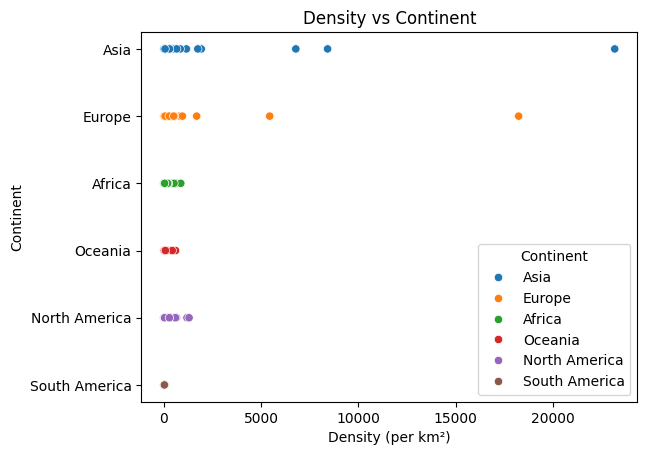

In [ ]:
sns.scatterplot(x='Density (per km²)', y='Continent', hue= 'Continent', data=df)
plt.xlabel('Density (per km²)')
plt.ylabel('Continent')
plt.title('Density vs Continent')
plt.show()

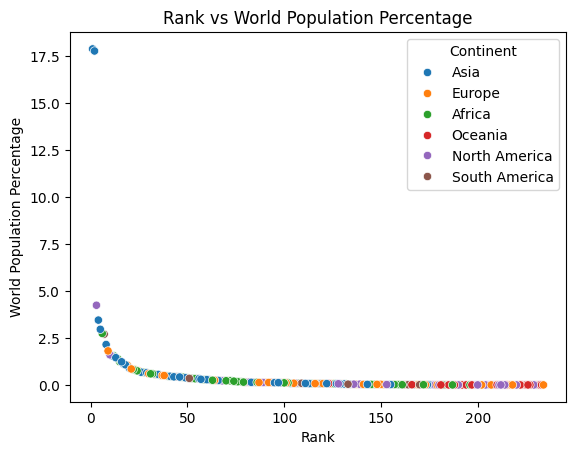

In [ ]:
sns.scatterplot(x='Rank', y='World Population Percentage', hue= 'Continent', data=df)
plt.xlabel('Rank')
plt.ylabel('World Population Percentage')
plt.title('Rank vs World Population Percentage')
plt.show()

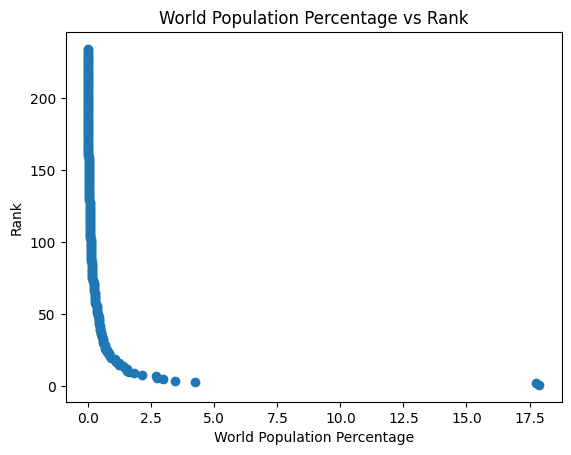

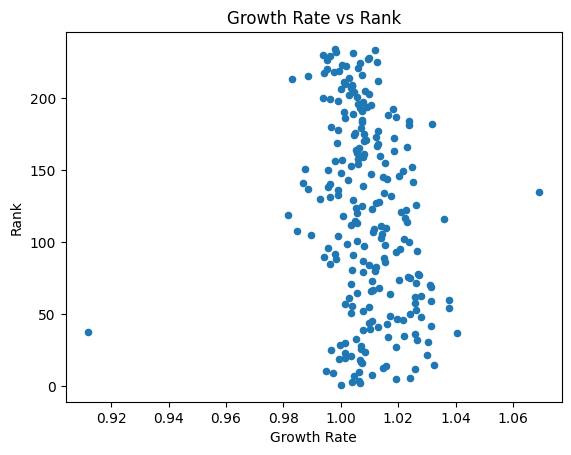

In [ ]:
#Scatter plot of World Population Percentage and Rank variable in data
plt.scatter(df['World Population Percentage'], df['Rank'])
plt.xlabel('World Population Percentage')
plt.ylabel('Rank')
plt.title('World Population Percentage vs Rank')
plt.show()

#Scatter plot of Growth Rate and Rank variable in data
df.plot(kind='scatter',x='Growth Rate',y='Rank',title='Growth Rate vs Rank')
plt.show()

**Pair Plot**

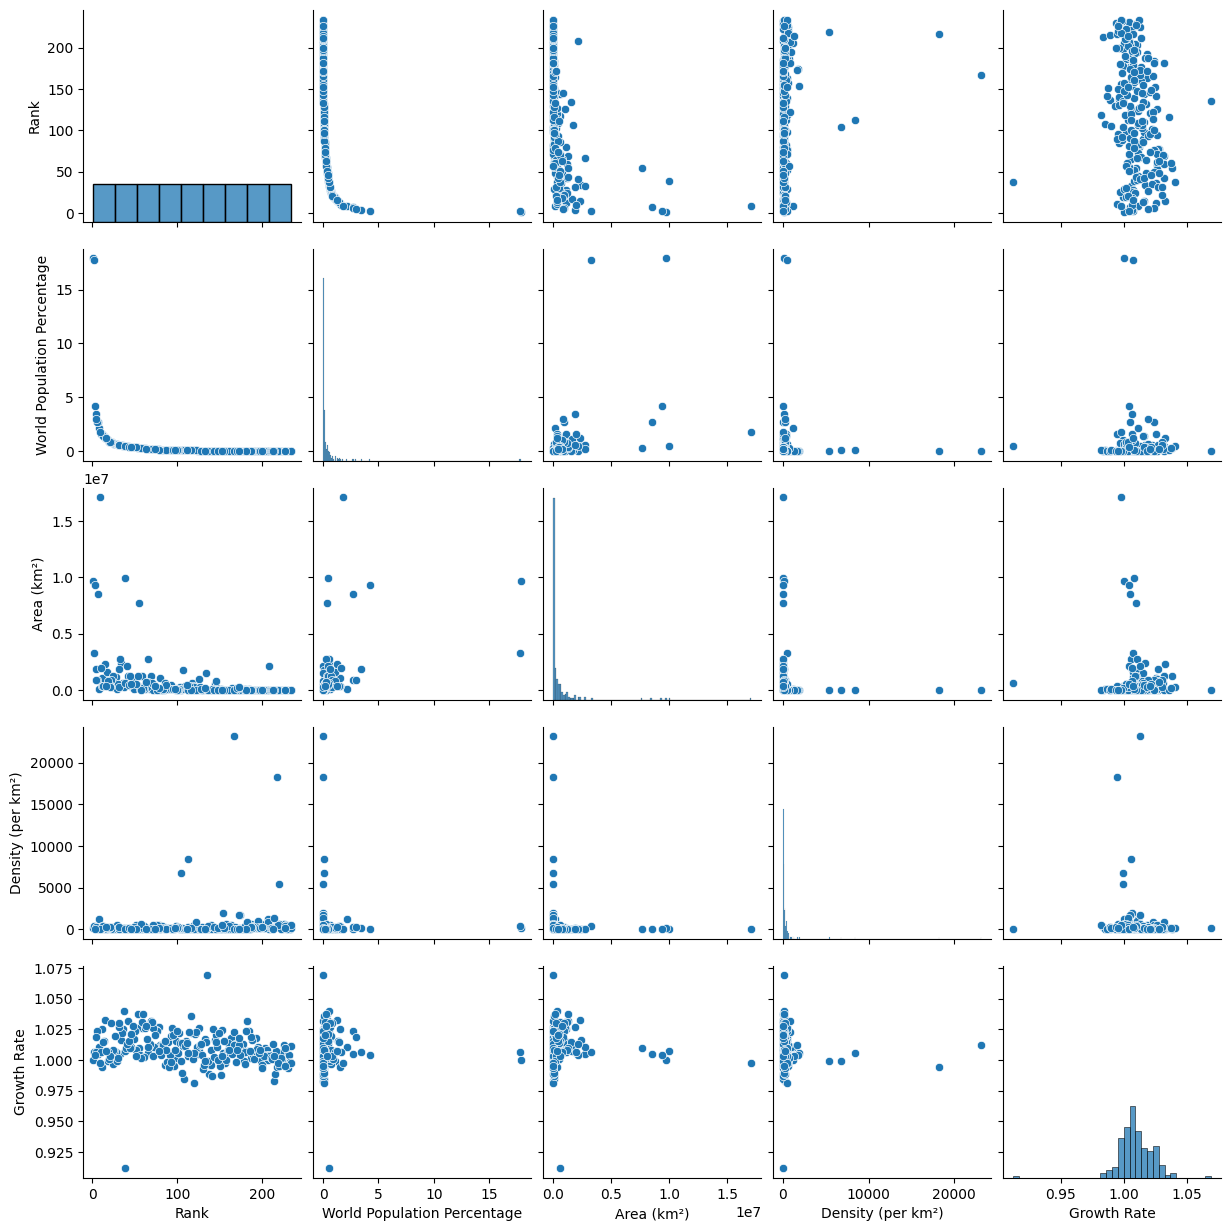

In [ ]:
sns.pairplot(df, vars=['Rank', 'World Population Percentage', 'Area (km²)', 'Density (per km²)', 'Growth Rate'])
plt.show()

**Correlation Matrix**

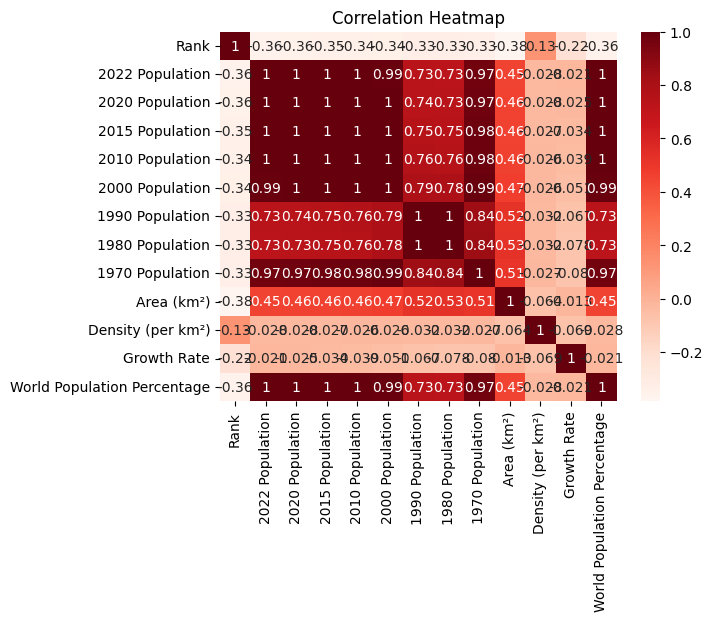

In [ ]:
# Calculate correlation on numeric columns only
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

# **5. Numeric Categorical Analysis**

In [ ]:
df.groupby('Continent')['World Population Percentage'].mean()

,World Population Percentage
Continent,
Africa,0.313509
Asia,1.183800
Europe,0.186600
North America,0.187750
Oceania,0.023913
South America,0.391429


In [ ]:
df.groupby('Continent')['World Population Percentage'].median()

,World Population Percentage
Continent,
Africa,0.170
Asia,0.225
Europe,0.065
North America,0.000
Oceania,0.000
South America,0.190


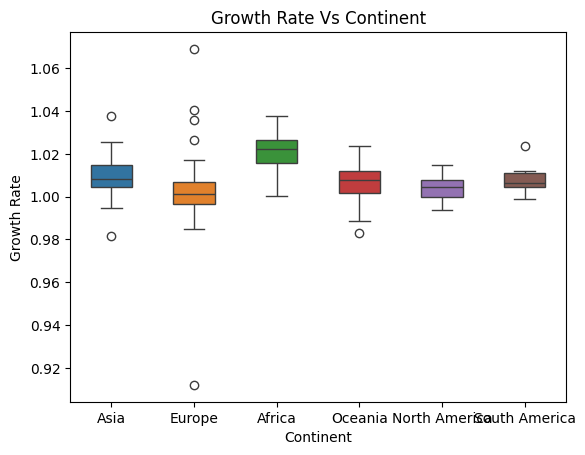

In [ ]:
sns.boxplot(x='Continent', y='Growth Rate', hue='Continent', data=df,  width=0.5)
plt.title('Growth Rate Vs Continent')
plt.show()

# **6. Multivariate Analysis**

In [ ]:
result=pd.pivot_table(data=df,index='Continent',values='World Population Percentage',aggfunc='mean')
result

,World Population Percentage
Continent,
Africa,0.313509
Asia,1.183800
Europe,0.186600
North America,0.187750
Oceania,0.023913
South America,0.391429


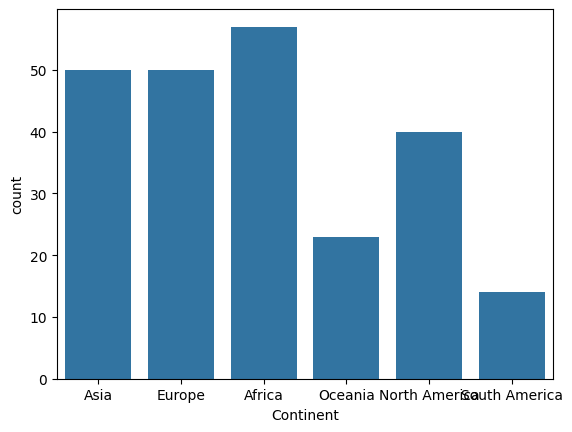

In [ ]:
sns.countplot(x='Continent', data=df)
plt.show()